In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import sklearn

from sklearn import preprocessing
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import norm

from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

### Data import and Preprocessing

In [2]:
raw_train_data = pd.read_csv('train.csv')

In [3]:
raw_train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
raw_train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
raw_train_data['TotalSF'] = raw_train_data['1stFlrSF'] + raw_train_data['2ndFlrSF']
raw_train_data['TotalBath'] = raw_train_data['BsmtFullBath'] + raw_train_data['BsmtHalfBath']*0.5 + raw_train_data['FullBath'] + raw_train_data['HalfBath']*0.5

In [6]:
raw_train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF,TotalBath
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,2,2008,WD,Normal,208500,1710,3.5
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,5,2007,WD,Normal,181500,1262,2.5
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,9,2008,WD,Normal,223500,1786,3.5
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,2,2006,WD,Abnorml,140000,1717,2.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,12,2008,WD,Normal,250000,2198,3.5


<AxesSubplot:>

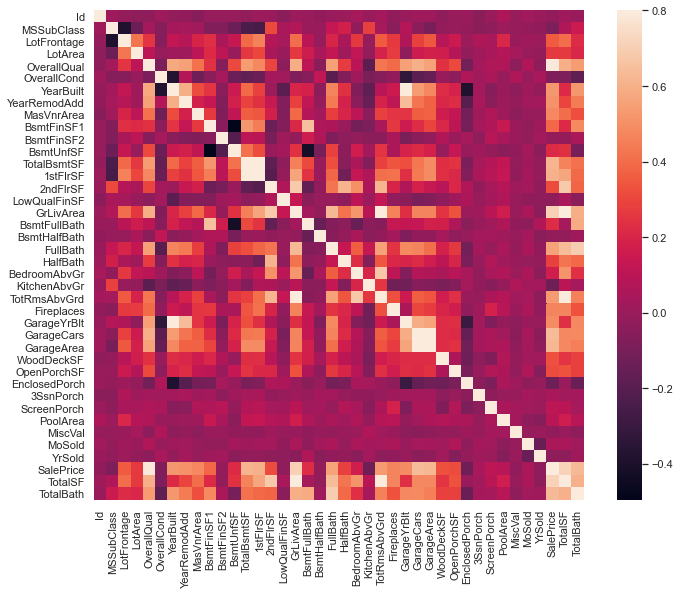

In [7]:
corrmat = raw_train_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

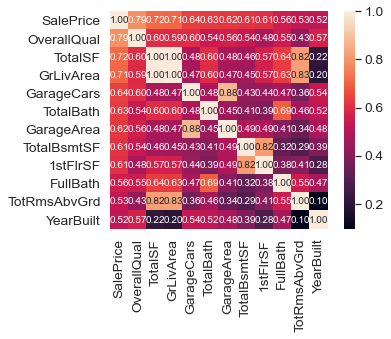

In [8]:
k = 12
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(raw_train_data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

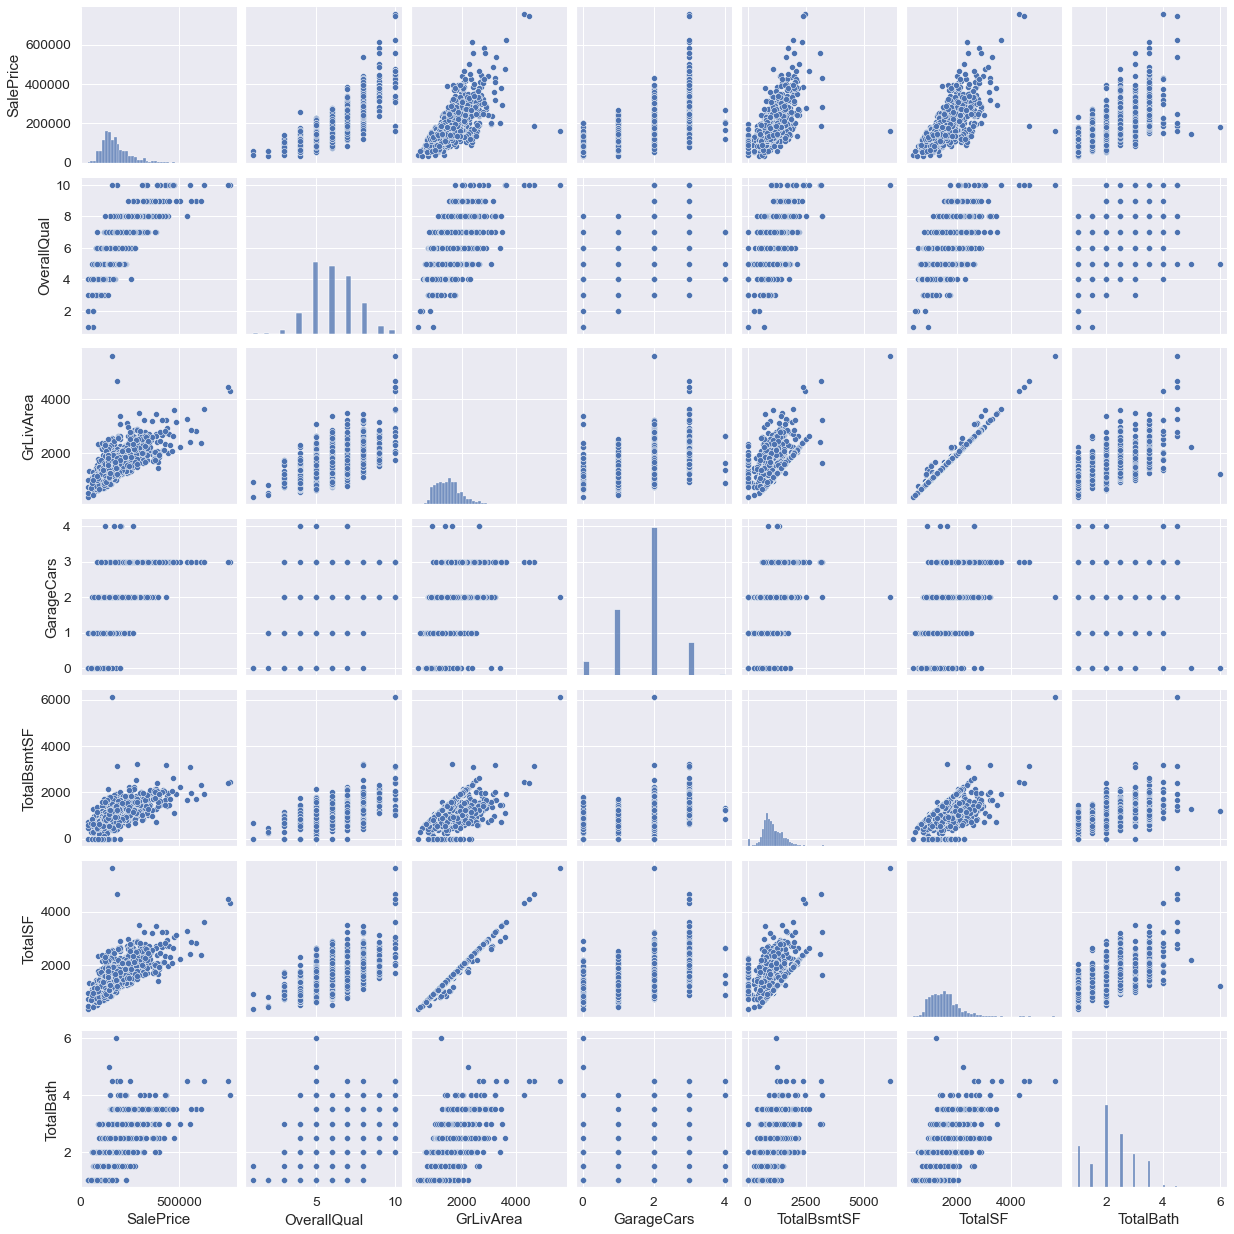

In [9]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'TotalSF', 'TotalBath']
sns.pairplot(raw_train_data[cols], height = 2.5)
plt.show()

In [10]:
total = raw_train_data[cols].isnull().sum().sort_values(ascending=False)

In [11]:
total

SalePrice      0
OverallQual    0
GrLivArea      0
GarageCars     0
TotalBsmtSF    0
TotalSF        0
TotalBath      0
dtype: int64

In [12]:
raw_train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF,TotalBath
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,2,2008,WD,Normal,208500,1710,3.5
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,5,2007,WD,Normal,181500,1262,2.5
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,9,2008,WD,Normal,223500,1786,3.5
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,2,2006,WD,Abnorml,140000,1717,2.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,12,2008,WD,Normal,250000,2198,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,8,2007,WD,Normal,175000,1647,2.5
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,MnPrv,NaN,0,2,2010,WD,Normal,210000,2073,3.0
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,GdPrv,Shed,2500,5,2010,WD,Normal,266500,2340,2.0
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,4,2010,WD,Normal,142125,1078,2.0


In [13]:
raw_train_data.columns.values

array(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'Pav

In [14]:
df_train = raw_train_data.drop(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallCond', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature',
       'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition'], axis = 1)

In [15]:
df_train

,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,GarageCars,SalePrice,TotalSF,TotalBath
0,7,2003,856,1710,2,208500,1710,3.5
1,6,1976,1262,1262,2,181500,1262,2.5
2,7,2001,920,1786,2,223500,1786,3.5
3,7,1915,756,1717,3,140000,1717,2.0
4,8,2000,1145,2198,3,250000,2198,3.5
...,...,...,...,...,...,...,...,...
1455,6,1999,953,1647,2,175000,1647,2.5
1456,6,1978,1542,2073,2,210000,2073,3.0
1457,7,1941,1152,2340,1,266500,2340,2.0
1458,5,1950,1078,1078,1,142125,1078,2.0


In [16]:
df_train.describe()

,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,GarageCars,SalePrice,TotalSF,TotalBath
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,6.099315,1971.267808,1057.429452,1515.463699,1.767123,180921.195890,1509.619178,2.210616
std,1.382997,30.202904,438.705324,525.480383,0.747315,79442.502883,521.163523,0.785399
min,1.000000,1872.000000,0.000000,334.000000,0.000000,34900.000000,334.000000,1.000000
25%,5.000000,1954.000000,795.750000,1129.500000,1.000000,129975.000000,1123.750000,2.000000
50%,6.000000,1973.000000,991.500000,1464.000000,2.000000,163000.000000,1458.000000,2.000000
75%,7.000000,2000.000000,1298.250000,1776.750000,2.000000,214000.000000,1775.250000,2.500000
max,10.000000,2010.000000,6110.000000,5642.000000,4.000000,755000.000000,5642.000000,6.000000


### Removing Outliers

In [17]:
df_train = df_train.drop(df_train[df_train['GrLivArea'] == 4676].index)
df_train = df_train.drop(df_train[df_train['GrLivArea'] == 5642].index)

In [18]:
df_train

,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,GarageCars,SalePrice,TotalSF,TotalBath
0,7,2003,856,1710,2,208500,1710,3.5
1,6,1976,1262,1262,2,181500,1262,2.5
2,7,2001,920,1786,2,223500,1786,3.5
3,7,1915,756,1717,3,140000,1717,2.0
4,8,2000,1145,2198,3,250000,2198,3.5
...,...,...,...,...,...,...,...,...
1455,6,1999,953,1647,2,175000,1647,2.5
1456,6,1978,1542,2073,2,210000,2073,3.0
1457,7,1941,1152,2340,1,266500,2340,2.0
1458,5,1950,1078,1078,1,142125,1078,2.0


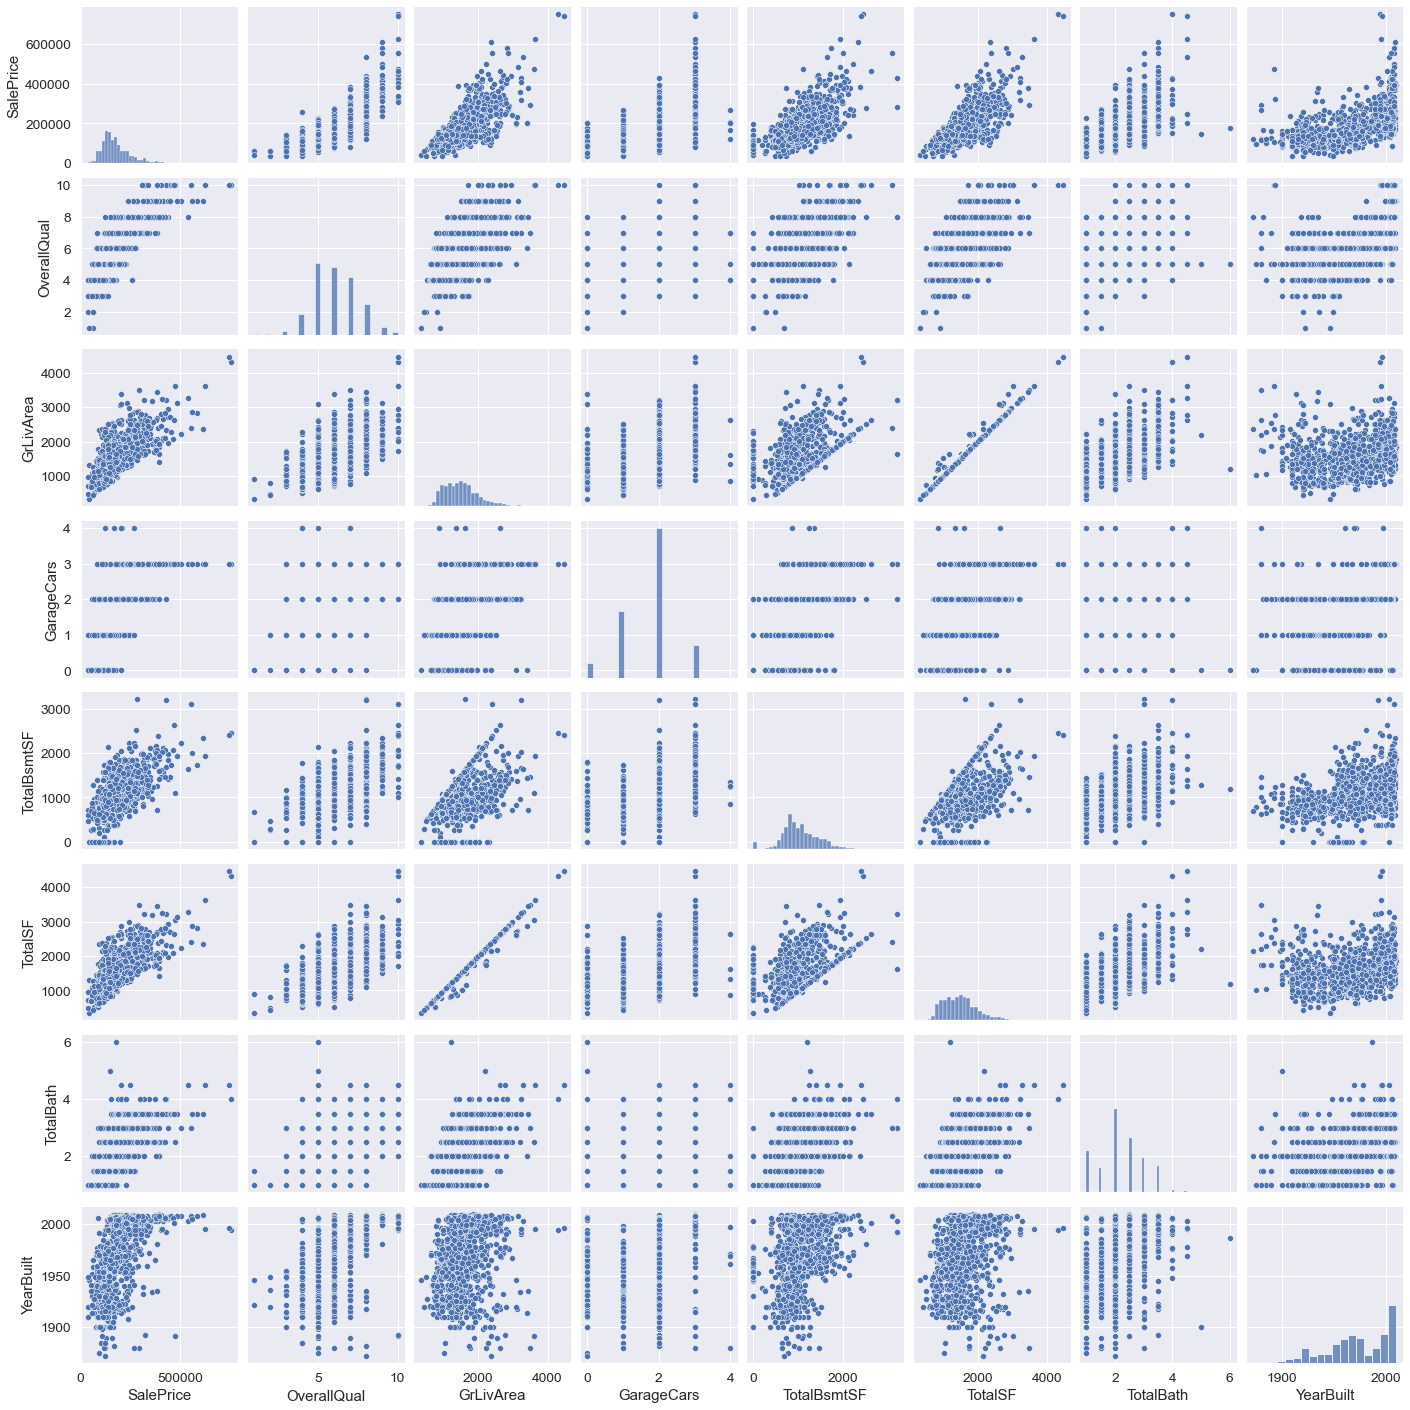

In [19]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'TotalSF', 'TotalBath', 'YearBuilt']
sns.pairplot(df_train[cols], height = 2.5)
plt.show()

### Normality

C:\Users\maria\anaconda3\envs\py3-TF2.0\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


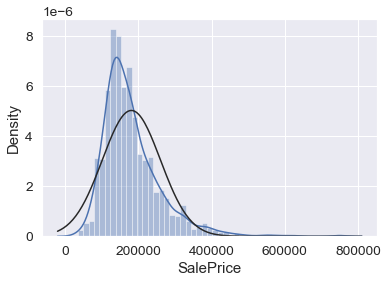

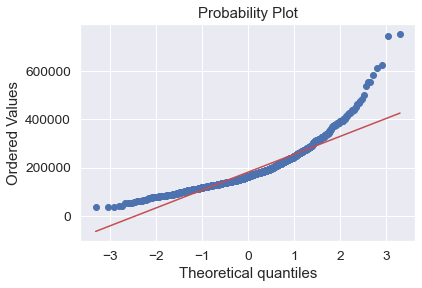

In [20]:
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

In [21]:
df_train['SalePrice'] = np.log(df_train['SalePrice'])

C:\Users\maria\anaconda3\envs\py3-TF2.0\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


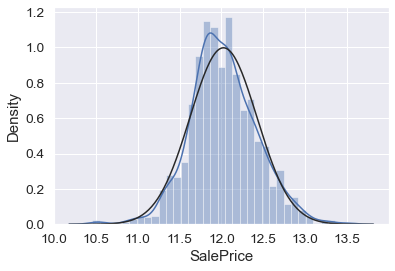

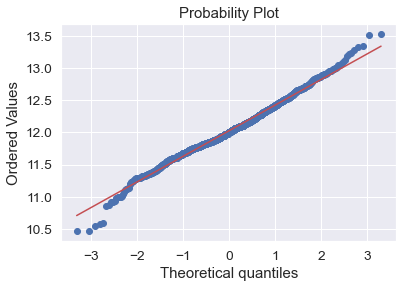

In [22]:
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

C:\Users\maria\anaconda3\envs\py3-TF2.0\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


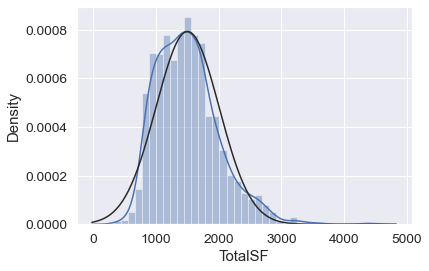

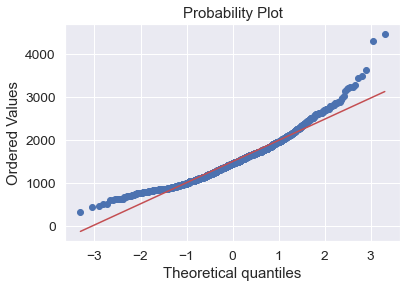

In [23]:
sns.distplot(df_train['TotalSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['TotalSF'], plot=plt)

In [24]:
df_train['TotalSF'] = np.log(df_train['TotalSF'])

C:\Users\maria\anaconda3\envs\py3-TF2.0\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


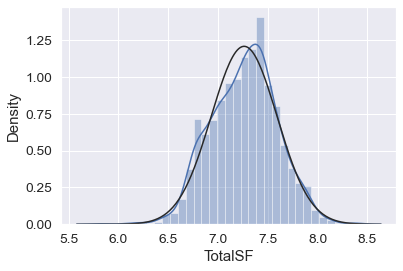

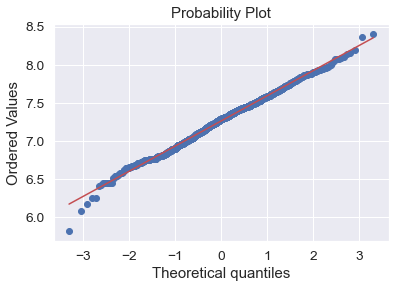

In [25]:
sns.distplot(df_train['TotalSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['TotalSF'], plot=plt)

C:\Users\maria\anaconda3\envs\py3-TF2.0\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


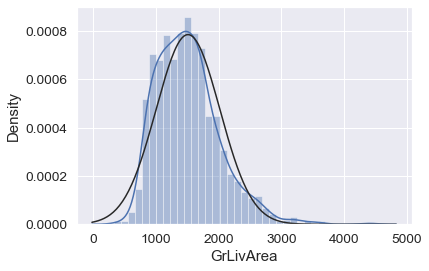

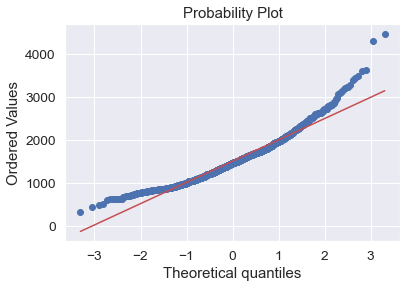

In [26]:
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

In [27]:
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])

C:\Users\maria\anaconda3\envs\py3-TF2.0\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


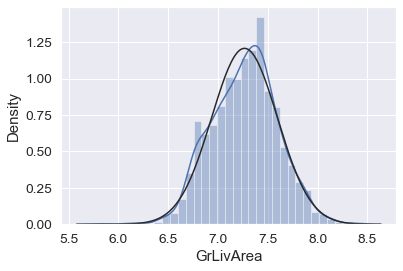

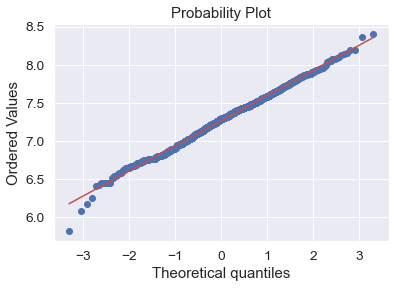

In [28]:
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

In [29]:
df_train

,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,GarageCars,SalePrice,TotalSF,TotalBath
0,7,2003,856,7.444249,2,12.247694,7.444249,3.5
1,6,1976,1262,7.140453,2,12.109011,7.140453,2.5
2,7,2001,920,7.487734,2,12.317167,7.487734,3.5
3,7,1915,756,7.448334,3,11.849398,7.448334,2.0
4,8,2000,1145,7.695303,3,12.429216,7.695303,3.5
...,...,...,...,...,...,...,...,...
1455,6,1999,953,7.406711,2,12.072541,7.406711,2.5
1456,6,1978,1542,7.636752,2,12.254863,7.636752,3.0
1457,7,1941,1152,7.757906,1,12.493130,7.757906,2.0
1458,5,1950,1078,6.982863,1,11.864462,6.982863,2.0


C:\Users\maria\anaconda3\envs\py3-TF2.0\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


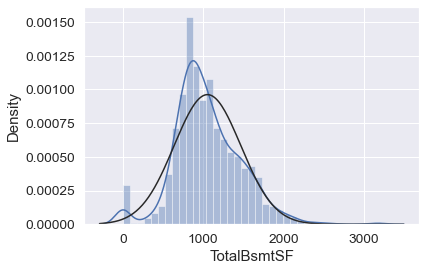

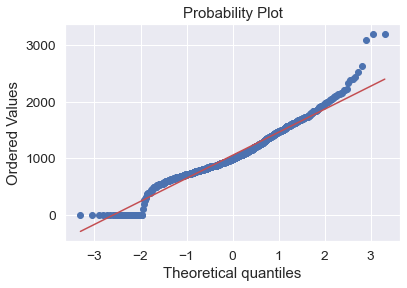

In [30]:
sns.distplot(df_train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)

In [31]:
df_train

,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,GarageCars,SalePrice,TotalSF,TotalBath
0,7,2003,856,7.444249,2,12.247694,7.444249,3.5
1,6,1976,1262,7.140453,2,12.109011,7.140453,2.5
2,7,2001,920,7.487734,2,12.317167,7.487734,3.5
3,7,1915,756,7.448334,3,11.849398,7.448334,2.0
4,8,2000,1145,7.695303,3,12.429216,7.695303,3.5
...,...,...,...,...,...,...,...,...
1455,6,1999,953,7.406711,2,12.072541,7.406711,2.5
1456,6,1978,1542,7.636752,2,12.254863,7.636752,3.0
1457,7,1941,1152,7.757906,1,12.493130,7.757906,2.0
1458,5,1950,1078,6.982863,1,11.864462,6.982863,2.0


### Data preparation for the algorithm

In [32]:
raw_test_data = pd.read_csv('test.csv')

In [33]:
raw_test_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [34]:
raw_test_data['TotalSF'] = raw_test_data['1stFlrSF'] + raw_test_data['2ndFlrSF']
raw_test_data['TotalBath'] = raw_test_data['BsmtFullBath'] + raw_test_data['BsmtHalfBath']*0.5 + raw_test_data['FullBath'] + raw_test_data['HalfBath']*0.5

In [35]:
raw_test_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSF,TotalBath
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,NaN,0,6,2010,WD,Normal,896,1.0
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,Gar2,12500,6,2010,WD,Normal,1329,1.5
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,NaN,MnPrv,NaN,0,3,2010,WD,Normal,1629,2.5
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,6,2010,WD,Normal,1604,2.5
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,NaN,NaN,NaN,0,1,2010,WD,Normal,1280,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,6,2006,WD,Normal,1092,1.5
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2006,WD,Abnorml,1092,1.5
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2006,WD,Abnorml,1224,2.0
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,Shed,700,7,2006,WD,Normal,970,1.5


In [36]:
df_test = raw_test_data.drop(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallCond', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature',
       'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition'], axis = 1)

In [42]:
df_test

,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,GarageCars,TotalSF,TotalBath
0,5,1961,882.0,896,1.0,896,1.0
1,6,1958,1329.0,1329,1.0,1329,1.5
2,5,1997,928.0,1629,2.0,1629,2.5
3,6,1998,926.0,1604,2.0,1604,2.5
4,8,1992,1280.0,1280,2.0,1280,2.0
...,...,...,...,...,...,...,...
1454,4,1970,546.0,1092,0.0,1092,1.5
1455,4,1970,546.0,1092,1.0,1092,1.5
1456,5,1960,1224.0,1224,2.0,1224,2.0
1457,5,1992,912.0,970,0.0,970,1.5


In [43]:
df_test.columns.values

array(['OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea',
       'GarageCars', 'TotalSF', 'TotalBath'], dtype=object)

### Imputing missing values in df_test

In [44]:
from sklearn.impute import KNNImputer

In [45]:
imputer = KNNImputer(n_neighbors=2) 
imputed_test_data = imputer.fit_transform(df_test)

In [46]:
imputed_test_data

array([[5.000e+00, 1.961e+03, 8.820e+02, ..., 1.000e+00, 8.960e+02,
        1.000e+00],
       [6.000e+00, 1.958e+03, 1.329e+03, ..., 1.000e+00, 1.329e+03,
        1.500e+00],
       [5.000e+00, 1.997e+03, 9.280e+02, ..., 2.000e+00, 1.629e+03,
        2.500e+00],
       ...,
       [5.000e+00, 1.960e+03, 1.224e+03, ..., 2.000e+00, 1.224e+03,
        2.000e+00],
       [5.000e+00, 1.992e+03, 9.120e+02, ..., 0.000e+00, 9.700e+02,
        1.500e+00],
       [7.000e+00, 1.993e+03, 9.960e+02, ..., 3.000e+00, 2.000e+03,
        2.500e+00]])

In [47]:
imputed_test_data = pd.DataFrame(imputed_test_data)

In [48]:
imputed_test_data

,0,1,2,3,4,5,6
0,5.0,1961.0,882.0,896.0,1.0,896.0,1.0
1,6.0,1958.0,1329.0,1329.0,1.0,1329.0,1.5
2,5.0,1997.0,928.0,1629.0,2.0,1629.0,2.5
3,6.0,1998.0,926.0,1604.0,2.0,1604.0,2.5
4,8.0,1992.0,1280.0,1280.0,2.0,1280.0,2.0
...,...,...,...,...,...,...,...
1454,4.0,1970.0,546.0,1092.0,0.0,1092.0,1.5
1455,4.0,1970.0,546.0,1092.0,1.0,1092.0,1.5
1456,5.0,1960.0,1224.0,1224.0,2.0,1224.0,2.0
1457,5.0,1992.0,912.0,970.0,0.0,970.0,1.5


In [49]:
imputed_test_data.columns = ['OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea',
       'GarageCars', 'TotalSF', 'TotalBath']

In [50]:
imputed_test_data

,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,GarageCars,TotalSF,TotalBath
0,5.0,1961.0,882.0,896.0,1.0,896.0,1.0
1,6.0,1958.0,1329.0,1329.0,1.0,1329.0,1.5
2,5.0,1997.0,928.0,1629.0,2.0,1629.0,2.5
3,6.0,1998.0,926.0,1604.0,2.0,1604.0,2.5
4,8.0,1992.0,1280.0,1280.0,2.0,1280.0,2.0
...,...,...,...,...,...,...,...
1454,4.0,1970.0,546.0,1092.0,0.0,1092.0,1.5
1455,4.0,1970.0,546.0,1092.0,1.0,1092.0,1.5
1456,5.0,1960.0,1224.0,1224.0,2.0,1224.0,2.0
1457,5.0,1992.0,912.0,970.0,0.0,970.0,1.5


In [51]:
imputed_test_data.describe()

,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,GarageCars,TotalSF,TotalBath
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,6.078821,1971.357779,1046.013708,1486.045922,1.765936,1482.502399,2.226182
std,1.436812,30.390071,442.764623,485.566099,0.775710,485.346117,0.831009
min,1.000000,1879.000000,0.000000,407.000000,0.000000,407.000000,1.000000
25%,5.000000,1953.000000,784.000000,1117.500000,1.000000,1115.000000,1.500000
50%,6.000000,1973.000000,988.000000,1432.000000,2.000000,1427.000000,2.000000
75%,7.000000,2001.000000,1304.000000,1721.000000,2.000000,1719.000000,3.000000
max,10.000000,2010.000000,5095.000000,5095.000000,5.000000,5095.000000,7.000000


In [52]:
X_train = df_train.drop(['SalePrice'], axis = 1)

In [53]:
X_train

,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,GarageCars,TotalSF,TotalBath
0,7,2003,856,7.444249,2,7.444249,3.5
1,6,1976,1262,7.140453,2,7.140453,2.5
2,7,2001,920,7.487734,2,7.487734,3.5
3,7,1915,756,7.448334,3,7.448334,2.0
4,8,2000,1145,7.695303,3,7.695303,3.5
...,...,...,...,...,...,...,...
1455,6,1999,953,7.406711,2,7.406711,2.5
1456,6,1978,1542,7.636752,2,7.636752,3.0
1457,7,1941,1152,7.757906,1,7.757906,2.0
1458,5,1950,1078,6.982863,1,6.982863,2.0


In [54]:
Y_train = df_train['SalePrice']

In [55]:
Y_train

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1458, dtype: float64

C:\Users\maria\anaconda3\envs\py3-TF2.0\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


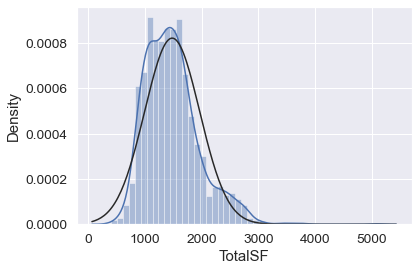

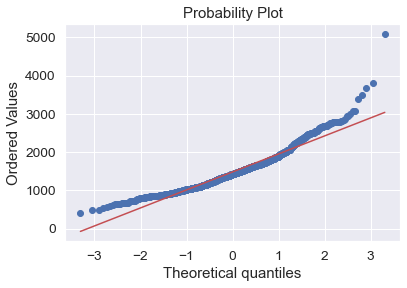

In [56]:
sns.distplot(imputed_test_data['TotalSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(imputed_test_data['TotalSF'], plot=plt)

In [57]:
imputed_test_data['TotalSF'] = np.log(imputed_test_data['TotalSF'])

C:\Users\maria\anaconda3\envs\py3-TF2.0\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


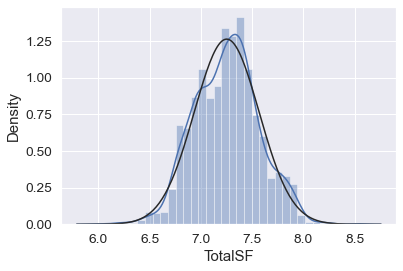

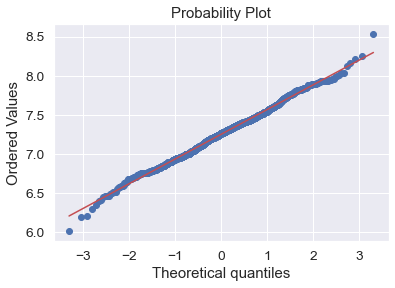

In [58]:
sns.distplot(imputed_test_data['TotalSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(imputed_test_data['TotalSF'], plot=plt)

C:\Users\maria\anaconda3\envs\py3-TF2.0\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


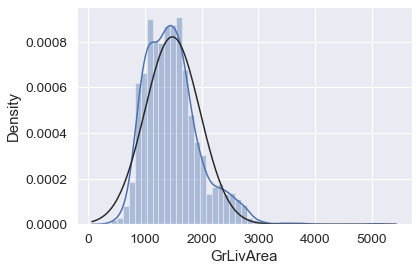

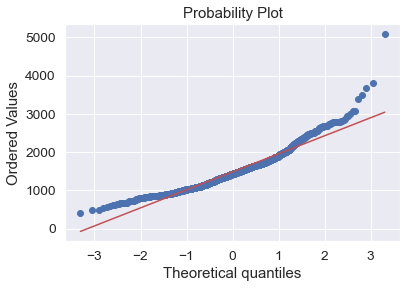

In [59]:
sns.distplot(imputed_test_data['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(imputed_test_data['GrLivArea'], plot=plt)

In [60]:
imputed_test_data['GrLivArea'] = np.log(imputed_test_data['GrLivArea'])

C:\Users\maria\anaconda3\envs\py3-TF2.0\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


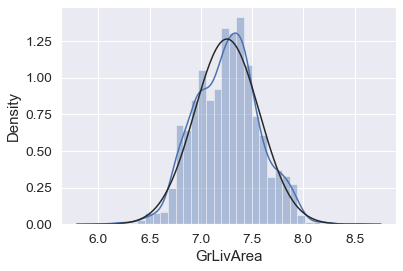

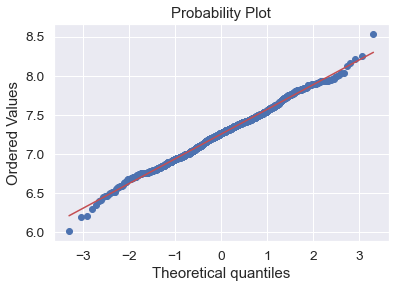

In [61]:
sns.distplot(imputed_test_data['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(imputed_test_data['GrLivArea'], plot=plt)

C:\Users\maria\anaconda3\envs\py3-TF2.0\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


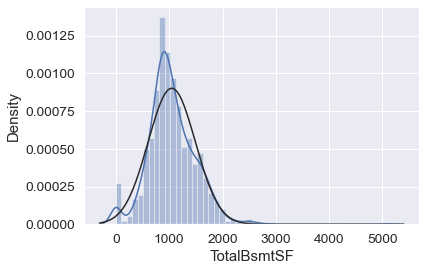

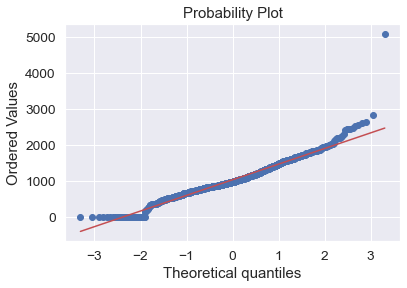

In [62]:
sns.distplot(imputed_test_data['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(imputed_test_data['TotalBsmtSF'], plot=plt)

In [63]:
imputed_test_data

,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,GarageCars,TotalSF,TotalBath
0,5.0,1961.0,882.0,6.797940,1.0,6.797940,1.0
1,6.0,1958.0,1329.0,7.192182,1.0,7.192182,1.5
2,5.0,1997.0,928.0,7.395722,2.0,7.395722,2.5
3,6.0,1998.0,926.0,7.380256,2.0,7.380256,2.5
4,8.0,1992.0,1280.0,7.154615,2.0,7.154615,2.0
...,...,...,...,...,...,...,...
1454,4.0,1970.0,546.0,6.995766,0.0,6.995766,1.5
1455,4.0,1970.0,546.0,6.995766,1.0,6.995766,1.5
1456,5.0,1960.0,1224.0,7.109879,2.0,7.109879,2.0
1457,5.0,1992.0,912.0,6.877296,0.0,6.877296,1.5


In [64]:
X_test = imputed_test_data.copy()

In [65]:
X_test

,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,GarageCars,TotalSF,TotalBath
0,5.0,1961.0,882.0,6.797940,1.0,6.797940,1.0
1,6.0,1958.0,1329.0,7.192182,1.0,7.192182,1.5
2,5.0,1997.0,928.0,7.395722,2.0,7.395722,2.5
3,6.0,1998.0,926.0,7.380256,2.0,7.380256,2.5
4,8.0,1992.0,1280.0,7.154615,2.0,7.154615,2.0
...,...,...,...,...,...,...,...
1454,4.0,1970.0,546.0,6.995766,0.0,6.995766,1.5
1455,4.0,1970.0,546.0,6.995766,1.0,6.995766,1.5
1456,5.0,1960.0,1224.0,7.109879,2.0,7.109879,2.0
1457,5.0,1992.0,912.0,6.877296,0.0,6.877296,1.5


In [66]:
X_test.describe()

,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,GarageCars,TotalSF,TotalBath
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,6.078821,1971.357779,1046.013708,7.253745,1.765936,7.251264,2.226182
std,1.436812,30.390071,442.764623,0.316152,0.775710,0.316311,0.831009
min,1.000000,1879.000000,0.000000,6.008813,0.000000,6.008813,1.000000
25%,5.000000,1953.000000,784.000000,7.018849,1.000000,7.016609,1.500000
50%,6.000000,1973.000000,988.000000,7.266827,2.000000,7.263330,2.000000
75%,7.000000,2001.000000,1304.000000,7.450661,2.000000,7.449498,3.000000
max,10.000000,2010.000000,5095.000000,8.536015,5.000000,8.536015,7.000000


In [67]:
X_test.isnull().sum()

OverallQual    0
YearBuilt      0
TotalBsmtSF    0
GrLivArea      0
GarageCars     0
TotalSF        0
TotalBath      0
dtype: int64

In [68]:
from sklearn.model_selection import train_test_split

X_train_mod, X_test_mod, Y_train_mod, Y_test_mod = train_test_split(X_train, Y_train, test_size=0.20, random_state=42)

### Random Forest

In [69]:
regressor = RandomForestRegressor(n_estimators=200, max_depth = 50, random_state=0)
regressor.fit(X_train_mod, Y_train_mod)
Y_pred = regressor.predict(X_test_mod)

In [70]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test_mod, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test_mod, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test_mod, Y_pred)))

Mean Absolute Error: 0.11159869058888218
Mean Squared Error: 0.027924236032724713
Root Mean Squared Error: 0.16710546380272762


In [71]:
Predicted_prices_log = regressor.predict(X_test)

In [72]:
Predicted_prices_log

array([11.62502627, 11.89940459, 11.99262398, ..., 11.92583021,
       11.66263104, 12.37827083])

In [73]:
Predicted_prices = np.exp(Predicted_prices_log)

In [74]:
Predicted_prices

array([111862.56215582, 147178.96738592, 161558.72460941, ...,
       151120.10692455, 116149.22172516, 237582.64617705])

In [75]:
output = pd.DataFrame({'Id': raw_test_data.Id, 'SalePrice': Predicted_prices})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
